In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = "ws_3"
df = pd.read_csv("input/"+ dataset +".csv")
df_freq = pd.read_csv("results/"+dataset+"_frequency.csv")
df_info = pd.read_csv("results/"+dataset+"_information.csv")
df_entropy = pd.read_csv("results/"+dataset+"_entropy.csv")
df_broadunicast = pd.read_csv("results/"+dataset+"_broadcast_unicast.csv")


In [3]:
df_entropy

,dataset,value
0,ws_3,0.047406


In [4]:
df

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,52.45.193.184,192.168.0.146,TCP,66,443 > 57552 [ACK] Seq=1 Ack=1 Win=115 Len=0 ...
1,2,0.039953,54.183.142.105,192.168.0.146,TCP,66,443 > 57527 [ACK] Seq=1 Ack=1 Win=442 Len=0 ...
2,3,0.216789,192.168.0.137,239.255.255.250,SSDP,215,M-SEARCH * HTTP/1.1
3,4,0.235486,192.168.0.208,192.168.0.255,UDP,305,54915 > 54915 Len=263
4,5,0.235500,54.183.142.105,192.168.0.146,TLSv1.2,111,Application Data
...,...,...,...,...,...,...,...
468025,468026,5885.639871,192.168.0.146,54.183.142.105,TLSv1.2,194,Application Data
468026,468027,5885.661737,52.114.195.135,192.168.0.146,UDP,236,3480 > 61919 Len=194
468027,468028,5885.679718,52.114.195.135,192.168.0.146,UDP,236,3480 > 61919 Len=194
468028,468029,5885.703048,52.114.195.135,192.168.0.146,UDP,236,3480 > 61919 Len=194


### Apariciones por protocolo

<AxesSubplot:xlabel='Protocol'>

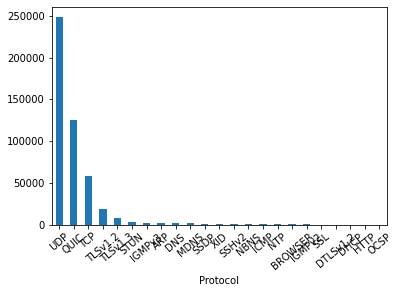

In [5]:
df.value_counts(df.Protocol).plot.bar(rot=40)

<AxesSubplot:xlabel='Protocol'>

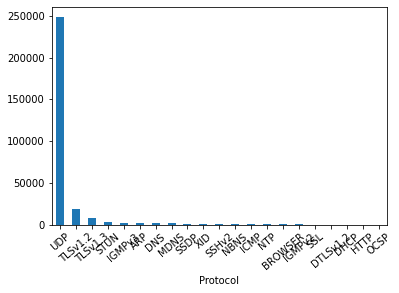

In [6]:
# Remove TCP & QUIC values
df2=df
df2 = df2[df2["Protocol"] != "TCP"]
df2 = df2[df2["Protocol"] != "QUIC"]
df2.value_counts(df.Protocol).plot.bar(rot=40)

### Frecuencia por protocolo

<AxesSubplot:xlabel='Protocol'>

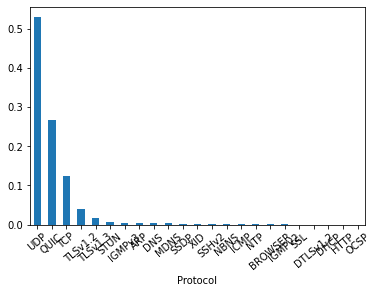

In [7]:

df["count"] = df.groupby("Protocol").sum().Length
df.value_counts(df.Protocol, normalize=True).plot.bar(rot=40)


# Frecuencia por protocolo

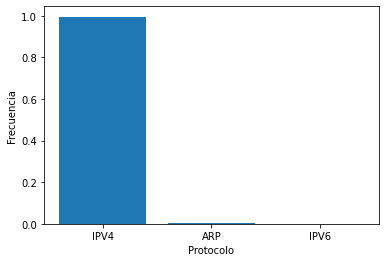

In [8]:
plt.bar(df_freq["type"], df_freq["value"])
plt.ylabel("Frecuencia")
plt.xlabel("Protocolo")
plt.savefig('./results/imgs/freq_{}_info.png'.format(dataset))
plt.show()

In [9]:
df_freq

,type,value
0,IPV4,0.995276
1,ARP,0.003347
2,IPV6,0.001377


# Informacion por protocolo

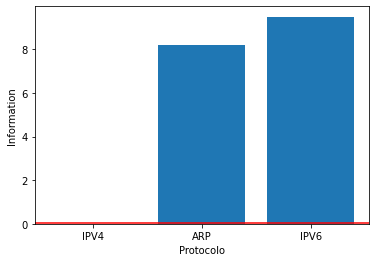

In [10]:
plt.bar(df_info["type"], df_info["value"])
plt.xlabel("Protocolo")
plt.ylabel("Information")
entropy = df_entropy[df_entropy["dataset"]==dataset]["value"].item()
plt.axhline(y=entropy, color='r', linestyle='-')

#plt.text(-1.1,entropy,'Entropia')
plt.savefig('./results/imgs/info_{}_info.png'.format(dataset))
plt.show()


<BarContainer object of 2 artists>

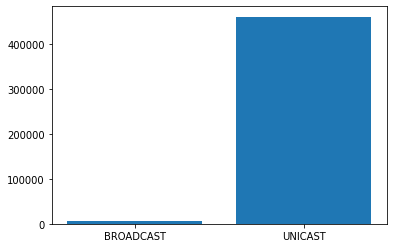

In [11]:
plt.bar(df_broadunicast["type"], df_broadunicast["value"])

In [15]:
df_broadunicast["percent"] = df_broadunicast["value"]/df_broadunicast["value"].sum()

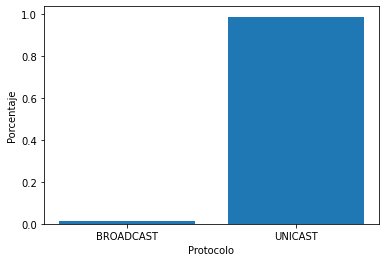

In [19]:
plt.bar(df_broadunicast["type"], df_broadunicast["percent"])
plt.xlabel("Protocolo")
plt.ylabel("Porcentaje")

plt.savefig('./results/imgs/broadunicast_{}_info.png'.format(dataset))
plt.show()